In [1]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [2]:
datos = pd.read_csv(DATOS_DIR + "zoo.csv", encoding='latin1')

datos.head()
#len(datos)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [3]:
datos.Clase.unique()
len(datos.animal.unique())

100

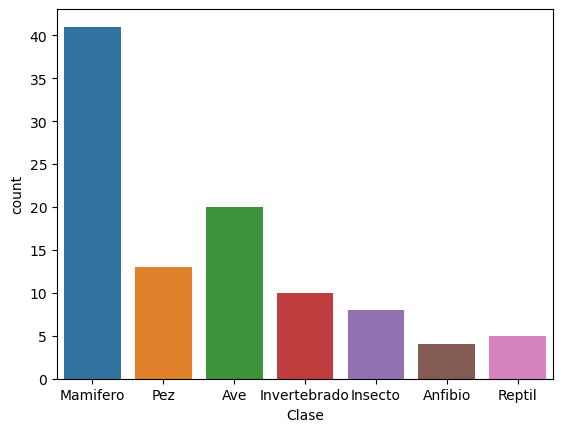

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Clase", data=datos)
plt.show()

## a)
Yo creo que la dificultad está en que solo las aves y mamíferos tienen más de 15 datos, por lo cual es probable que el modelo solo sea bueno prediciendo mamíferos

# b)
### A continuación vamos a entrenar el modelo sin dividir el dataset en train y test, simplemente porque así lo pide la consigna

In [5]:
mapeo = {
    "Clase":{'Mamifero':0, 'Pez':0, 'Ave':1, 'Invertebrado':0, 'Insecto':0, 'Anfibio':0, 'Reptil':0}
}
datos.replace(mapeo,inplace=True)
datos.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0


In [6]:
X = np.array(datos.iloc[:,1:-1])
T = np.array(datos['Clase'])

print(len(X))
print(len(T))

101
101


In [7]:
# X_train, X_test, T_train, T_test = model_selection.train_test_split(
#         X, T, test_size=0.30, random_state=42)
X = X.reshape(-1, 1)
X = X.reshape(-1, 1)
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
T  = normalizador.transform(T)

print(X)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
ppn = Perceptron(alpha=0.0001, n_iter=500, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [ ]:
Y_test = 0 * len(X) #necesario inicializar el array en 0?
Y_test = ppn.predict(X)
nAciertos = np.sum(Y_test == T)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T.shape)
print("cantidad de tests: ", X.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X.shape[0]))

In [ ]:
print(Y_test)

In [ ]:
print(T)

In [ ]:
print(ppn.w_)

# c)
El perceptrón detecta aves de la siguiente forma
Según mi opinión nos estamos encontrando con más errores en los pesos porque entrenamos con menos datos al perceptrón

In [ ]:
nro_columna = 1 #la primer columna del df no fue usada
pesos_por_columna = {}

for peso in ppn.w_:
    nombre_columna = datos.columns[nro_columna]
    if peso < 0:
        nombre_columna = "no "+nombre_columna
    pesos_por_columna.update({nombre_columna:abs(peso)})
    nro_columna += 1
    #print(nombre_columna, ":",peso)
    
pesos_ordenados = dict(sorted(pesos_por_columna.items(), key=lambda item: item[1], reverse=True))

print(pesos_ordenados.keys())